In [14]:
import json 
import random
import seaborn as sns 
from copy import deepcopy

with open("wallets.txt") as file:
    wallets = file.read().split("\n")

In [15]:
def mergewallets(wls, k):
    res = []
    for ix in range(0, len(wls), k):
        batch = wls[ix:ix+k]
        res.append(batch)
    
    drop_batch = []
    if len(res[-1]) < k:
        drop_batch = res.pop()
        
    
    return res, drop_batch

def split_into_tiers(wls, k):
    last = int(k/100 * len(wls))
    last = last + int(last % 2 != 0)

    return wls[:last], wls[last:]

def generate_config(wallets, min_sol_amount, max_sol_amount):
    dispatch_config = {}
    for wallet in wallets:
        solAmount = round(random.uniform(min_sol_amount, max_sol_amount), 2)
        dispatch_config[wallet] = solAmount

    return dispatch_config

def merge_wallets_in_conf(conf, merge_batchs):
    for batch in merge_batchs:
        first = batch[0]

        for key in batch[1:]:
            conf[first] += conf.pop(key)

In [16]:
stats = json.loads(open("statistic.json").read())

In [17]:
real_conf = {key: value['solBalance'] for key, value in stats.items()}

<Axes: ylabel='Count'>

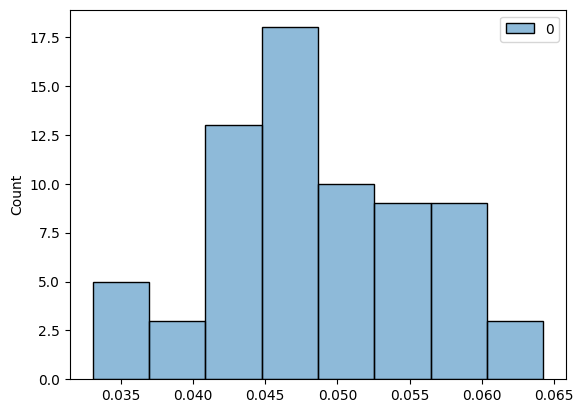

In [18]:
sns.histplot(real_conf.values())

число X кошельков: 36
число 2 X кошельков: 5
число 3 X кошельков: 8
всего кошельков: 49


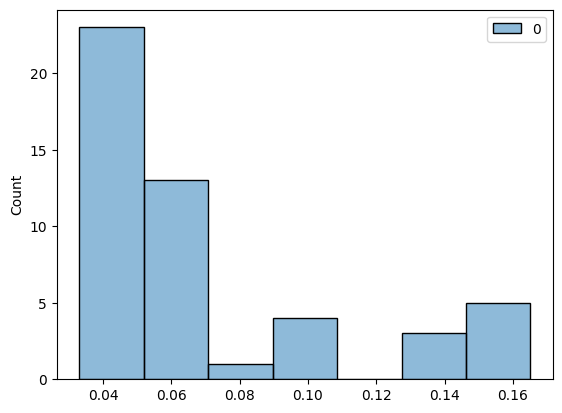

In [39]:
# conf = generate_config(wallets, 0.02, 0.06)
conf = deepcopy(real_conf)

a, b = split_into_tiers(wallets, 50)
c, d = split_into_tiers(a, 70)

c, c_drop = mergewallets(c, 3)
d, d_drop = mergewallets(d, 2)

b += c_drop 
b += d_drop 

print('число X кошельков:', len(b))
print('число 2 X кошельков:', len(d))
print('число 3 X кошельков:', len(c))

merge_wallets_in_conf(conf, d)
merge_wallets_in_conf(conf, c)

print('всего кошельков:', len(conf))
sns.histplot(conf.values());

In [9]:
len(conf)

51

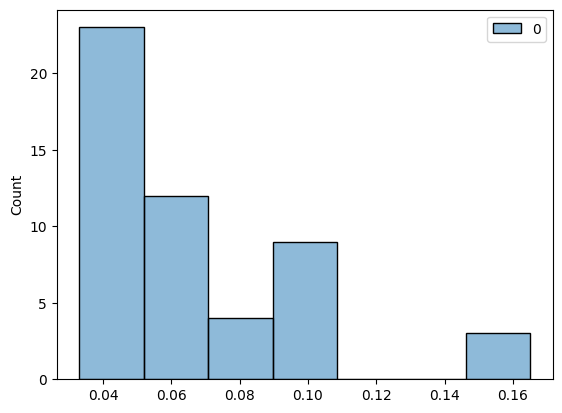

In [10]:
sns.histplot(conf.values());

In [60]:
import json


with open("dispatch_config.json", "w") as file:
    json.dump(conf, file)